In [1]:
# Unorganized code just used for testing

In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd
games = pd.read_csv('csv/carlsen_games.csv')
games.head()

,game_id,game_order,event,site,date_played,round,white,black,result,white_elo,...,termination,time_control,utc_date,utc_time,variant,ply_count,date_created,file_name,group_name_color,group_name_result
0,b61b981c-e005-4064-8cc8-6feae75530b3,1,Lichess Titled Arena 6,https://lichess.org/YpffsNPV,2018.08.04,?,BabaRamdev,damnsaltythatsport,1-0,2739,...,Normal,60+0,2018.08.04,20:58:08,Standard,NaN,2021-12-26T15:21:45+0000,damnsaltythatsport.pgn,black,lost
1,913cad09-25de-4c53-8937-17772cd05544,2,Lichess Titled Arena 6,https://lichess.org/TIzxPIZz,2018.08.04,?,damnsaltythatsport,penguingim1,1-0,2863,...,Normal,60+0,2018.08.04,20:56:59,Standard,NaN,2021-12-26T15:21:45+0000,damnsaltythatsport.pgn,white,won
2,62fcaebd-c829-4357-b9eb-1c1c373d6685,3,Lichess Titled Arena 6,https://lichess.org/FAWl09E2,2018.08.04,?,Hawk20,damnsaltythatsport,0-1,2677,...,Normal,60+0,2018.08.04,20:54:40,Standard,NaN,2021-12-26T15:21:45+0000,damnsaltythatsport.pgn,black,won
3,f075f85f-bafc-4d21-8841-cb3017fbd43b,4,Lichess Titled Arena 6,https://lichess.org/cEanOYfi,2018.08.04,?,damnsaltythatsport,opperwezen,1-0,2848,...,Normal,60+0,2018.08.04,20:52:19,Standard,NaN,2021-12-26T15:21:45+0000,damnsaltythatsport.pgn,white,won
4,bb6c0012-3863-4669-9c4e-9d230b720b04,5,Lichess Titled Arena 6,https://lichess.org/31FDS3I7,2018.08.04,?,caching,damnsaltythatsport,1-0,2770,...,Normal,60+0,2018.08.04,20:50:20,Standard,NaN,2021-12-26T15:21:45+0000,damnsaltythatsport.pgn,black,lost


In [4]:
games.shape

(13442, 31)

In [5]:
# Checking to see how many games are Standard vs other variants
games['variant'].value_counts()

Standard         13237
Chess960           144
Atomic              31
From Position       29
Crazyhouse           1
Name: variant, dtype: int64

In [6]:
games['time_control'].value_counts()

60+0       11471
180+0        800
30+0         382
45+0         255
180+2        200
15+0         134
120+1         71
600+5         36
120+0         21
300+0         20
300+3         18
60+1          12
1500+5        11
1200+10       10
60+2           1
Name: time_control, dtype: int64

In [7]:
games['group_name_color'].value_counts()

black    6753
white    6689
Name: group_name_color, dtype: int64

In [8]:
games['round'].value_counts()

?    13442
Name: round, dtype: int64

In [47]:
openings = games['eco'].value_counts().to_frame()
openings.reset_index(inplace=True)
openings[openings.eco>250]

,index,eco
0,A00,809
1,B01,566
2,B06,547
3,A04,421
4,A01,374
5,D00,337
6,A40,323
7,A45,317
8,B10,277
9,A05,256


In [43]:
[x for x in games['eco'].value_counts()]

[809,
 566,
 547,
 421,
 374,
 337,
 323,
 317,
 277,
 256,
 238,
 233,
 217,
 212,
 200,
 196,
 155,
 150,
 148,
 142,
 137,
 132,
 130,
 128,
 120,
 119,
 116,
 114,
 113,
 108,
 108,
 108,
 106,
 106,
 93,
 93,
 93,
 87,
 84,
 82,
 80,
 80,
 78,
 76,
 75,
 75,
 72,
 72,
 71,
 70,
 68,
 64,
 63,
 63,
 61,
 60,
 58,
 58,
 57,
 56,
 56,
 56,
 53,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 47,
 47,
 46,
 45,
 43,
 42,
 42,
 42,
 41,
 41,
 40,
 40,
 39,
 38,
 37,
 36,
 36,
 36,
 33,
 33,
 33,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 29,
 29,
 28,
 27,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 22,
 22,
 21,
 21,
 20,
 20,
 20,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,

In [10]:
games['event'].value_counts()

Rated Bullet game                   9779
Rated Blitz game                     629
Online League Bullet Arena           243
Bullet Shield Arena                  181
Lichess Titled Arena                 134
                                    ... 
Monthly SuperBlitz Arena               1
GM Andrew Tang Hyper Celebration       1
Hourly SuperBlitz Arena                1
del Corral Arena                       1
Daily Bullet Arena                     1
Name: event, Length: 79, dtype: int64

In [11]:
# shows whether white or black wins, NOT magnus, looks like white wins significantly more
games['result'].value_counts()

1-0        6579
0-1        5795
1/2-1/2    1068
Name: result, dtype: int64

In [12]:
# magnus win/loss/draw
games['group_name_result'].value_counts()

won     9129
lost    3245
draw    1068
Name: group_name_result, dtype: int64

In [13]:
games['file_name'].value_counts()

DrNykterstein.pgn         9748
neslraCsungaM77.pgn       1974
DrDrunkenstein.pgn         989
manwithavan.pgn            289
DrGrekenstein.pgn          114
DannytheDonkey.pgn         105
DrChampionstein.pgn         85
STL_Carlsen.pgn             75
damnsaltythatsport.pgn      62
MagnusCarlsen.pgn            1
Name: file_name, dtype: int64

In [14]:
games['termination'].value_counts()

Normal          11241
Time forfeit     2187
Abandoned          14
Name: termination, dtype: int64

In [15]:
games['date_played'].value_counts()

2020.04.02    277
2020.04.30    255
2020.04.05    215
2020.05.08    205
2020.03.23    165
             ... 
2019.03.09      1
2020.03.14      1
2018.02.24      1
2019.05.18      1
2018.01.27      1
Name: date_played, Length: 315, dtype: int64

In [16]:
games['utc_date'].value_counts()

2020.04.02    277
2020.04.30    255
2020.04.05    215
2020.05.08    205
2020.03.23    165
             ... 
2019.03.09      1
2020.03.14      1
2018.02.24      1
2019.05.18      1
2018.01.27      1
Name: utc_date, Length: 315, dtype: int64

In [17]:
games['utc_date'].equals(games['date_played'])

True

In [18]:
games['date_created'].value_counts()

2021-12-26T15:23:23+0000    192
2021-12-26T15:23:44+0000    188
2021-12-26T15:23:26+0000    179
2021-12-26T15:23:22+0000    174
2021-12-26T15:23:10+0000    173
                           ... 
2021-12-26T15:21:46+0000     16
2021-12-26T15:21:48+0000     14
2021-12-26T15:30:36+0000      7
2021-12-26T15:21:57+0000      6
2021-12-26T15:30:19+0000      2
Name: date_created, Length: 116, dtype: int64

In [19]:
usernames = pd.read_csv('csv/user_names.csv',encoding="ISO-8859-1")
usernames.head()

,user_name,real_name
0,aaryan_varshney,Aaryan Varshney
1,Abachmann,Axel Bachmann
2,AbasovN,Nijat Abasov
3,Abdisalimov,Abdimalik Abdisalimov
4,Abik02,Abdulla Gadimbayli


In [20]:
usernamedict = dict(zip(usernames.user_name,usernames.real_name))
usernamedict

{'aaryan_varshney': 'Aaryan Varshney  ',
 'Abachmann': 'Axel Bachmann',
 'AbasovN': 'Nijat Abasov',
 'Abdisalimov': 'Abdimalik Abdisalimov',
 'Abik02': 'Abdulla Gadimbayli',
 'abrito99': 'Rubén Domingo Núñez',
 'AdriD': 'Adrien Demuth  ',
 'agnivo2008': 'Agnivo Chakraborty',
 'Agronom6428': 'Roman Popov',
 'AlbinosGambit': 'Kolbjørn-Albin Johansen',
 'ALEKSANDROV73': 'Aleksei Aleksandrov',
 'alesha_kiselev': 'Alesha Kiselev',
 'Alexander_Sichkar': 'Alexander Sichkar',
 'Alexander_Zubov': 'Alexander Zubov',
 'Alexandr_KhleBovich': 'Alexander Khlebovich  ',
 'AlexeyOlegovich': 'Alexey Vlasenko',
 'alireza2003': 'Alireza Firouzja',
 'Allix': 'Alexander Walnum',
 'amaa18': 'Mobina Alinasab',
 'Aminoun': 'Amin',
 'Amirreza_p': 'Amirreza Pourramezanali',
 'amirsose97': 'amir mohammad hamidi',
 'Amsjob': 'Alexander Sjøberg',
 'Anand': 'Viswanathan Anand',
 'Andrey_Esipenko': 'Andrey Esipenko',
 'Andrey11976': 'Andrei Trushko ',
 'AndreyBelozerov': 'Andrei Belozerov',
 'AngelitoRT': 'Renato Al

In [38]:
usernamedict['DannyTheDonkey'] = 'Magnus Carlsen'

In [39]:
gamesnames = games.replace(usernamedict)

In [22]:
gamesnames

,game_id,game_order,event,site,date_played,round,white,black,result,white_elo,...,termination,time_control,utc_date,utc_time,variant,ply_count,date_created,file_name,group_name_color,group_name_result
0,b61b981c-e005-4064-8cc8-6feae75530b3,1,Lichess Titled Arena 6,https://lichess.org/YpffsNPV,2018.08.04,?,Akshat Chandra,Magnus Carlsen,1-0,2739,...,Normal,60+0,2018.08.04,20:58:08,Standard,NaN,2021-12-26T15:21:45+0000,damnsaltythatsport.pgn,black,lost
1,913cad09-25de-4c53-8937-17772cd05544,2,Lichess Titled Arena 6,https://lichess.org/TIzxPIZz,2018.08.04,?,Magnus Carlsen,Andrew Tang,1-0,2863,...,Normal,60+0,2018.08.04,20:56:59,Standard,NaN,2021-12-26T15:21:45+0000,damnsaltythatsport.pgn,white,won
2,62fcaebd-c829-4357-b9eb-1c1c373d6685,3,Lichess Titled Arena 6,https://lichess.org/FAWl09E2,2018.08.04,?,Hawk20,Magnus Carlsen,0-1,2677,...,Normal,60+0,2018.08.04,20:54:40,Standard,NaN,2021-12-26T15:21:45+0000,damnsaltythatsport.pgn,black,won
3,f075f85f-bafc-4d21-8841-cb3017fbd43b,4,Lichess Titled Arena 6,https://lichess.org/cEanOYfi,2018.08.04,?,Magnus Carlsen,Vincent Rothuis,1-0,2848,...,Normal,60+0,2018.08.04,20:52:19,Standard,NaN,2021-12-26T15:21:45+0000,damnsaltythatsport.pgn,white,won
4,bb6c0012-3863-4669-9c4e-9d230b720b04,5,Lichess Titled Arena 6,https://lichess.org/31FDS3I7,2018.08.04,?,caching,Magnus Carlsen,1-0,2770,...,Normal,60+0,2018.08.04,20:50:20,Standard,NaN,2021-12-26T15:21:45+0000,damnsaltythatsport.pgn,black,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,f976c4fb-5e47-4e30-9873-ad7329f23eec,71,Casual Rapid game,https://lichess.org/cL7TBhrX,2020.06.06,?,Magnus Carlsen,Jeffery Xiong,0-1,2881,...,Normal,600+5,2020.06.06,20:11:23,Standard,NaN,2021-12-26T15:31:49+0000,STL_Carlsen.pgn,white,lost
13438,4b39774a-70aa-4079-b6c9-225a377e0635,72,Casual Rapid game,https://lichess.org/3pRy71II,2020.06.06,?,Jeffery Xiong,Magnus Carlsen,1/2-1/2,2730,...,Normal,600+5,2020.06.06,19:39:07,Standard,NaN,2021-12-26T15:31:49+0000,STL_Carlsen.pgn,black,draw
13439,d1c00844-fdb6-4651-8a8d-d2256ef4f202,73,Casual Rapid game,https://lichess.org/YGcSAXyq,2020.06.06,?,Magnus Carlsen,Jeffery Xiong,1-0,2881,...,Normal,600+5,2020.06.06,19:14:18,Standard,NaN,2021-12-26T15:31:49+0000,STL_Carlsen.pgn,white,won
13440,47bdf460-ae8c-4d60-a996-8cf93c43203e,74,Casual Rapid game,https://lichess.org/Mdp1nKCZ,2020.06.06,?,Jeffery Xiong,Magnus Carlsen,0-1,2730,...,Normal,600+5,2020.06.06,18:30:37,Standard,NaN,2021-12-26T15:31:49+0000,STL_Carlsen.pgn,black,won


In [23]:
gamesnames[gamesnames.white == 'Eric Hansen'].shape[0]

189

In [24]:
gamesnames['white'].value_counts()

Magnus Carlsen          6689
Andrew Tang              840
Daniel Naroditsky        623
Alireza Firouzja         396
Sergei Zhigalko          299
                        ... 
Krzysztof Budrewicz        1
Matias  Pérez Gormaz       1
VaibhavRana2003            1
Nikolay Chadaev            1
Gary Kasparov              1
Name: white, Length: 725, dtype: int64

In [32]:
# 105 games don't have mangus as black? will fix
gamesnames['black'].value_counts()

Magnus Carlsen        6648
Andrew Tang            862
Daniel Naroditsky      608
Alireza Firouzja       400
Sergei Zhigalko        300
                      ... 
Matej  Sebenik           1
Pouya Idani              1
Imre Balog               1
Gevorg Harutjunyan       1
Peter Svidler            1
Name: black, Length: 748, dtype: int64

In [37]:
np.where((gamesnames['black']!='Magnus Carlsen') & (gamesnames['white']!='Magnus Carlsen'))
# dictionary has 'DannytheDonkey' but games has 'DannyTheDonkey' will fix manually

(array([ 62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166], dtype=int64),)

In [40]:
gamesnames['black'].value_counts() 

Magnus Carlsen        6700
Andrew Tang            862
Daniel Naroditsky      608
Alireza Firouzja       400
Sergei Zhigalko        300
                      ... 
Matej  Sebenik           1
Pouya Idani              1
Imre Balog               1
Gevorg Harutjunyan       1
Peter Svidler            1
Name: black, Length: 747, dtype: int64

In [41]:
gamesnames['white'].value_counts()
# looks like the group_name_color was black for all of those 'DannyTheDonkey' games when that's not the case
# 'DannyTheDonkey' group_name_result needs to be fixed as well ... 
# winner column looks correct though, ideally I extract the actual winner from the pgn data to avoid human error
# 6700 black + 6742 white adds up to 13442 games

Magnus Carlsen       6742
Andrew Tang           840
Daniel Naroditsky     623
Alireza Firouzja      396
Sergei Zhigalko       299
                     ... 
alfredelias             1
OddManOfTheBush         1
rchristoffer            1
Plaguuu                 1
Gary Kasparov           1
Name: white, Length: 724, dtype: int64

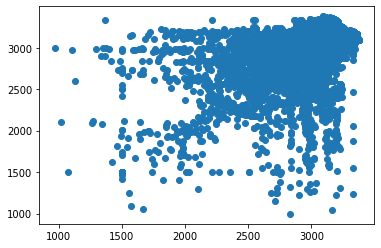

In [25]:
plt.scatter(gamesnames.white_elo,gamesnames.black_elo)

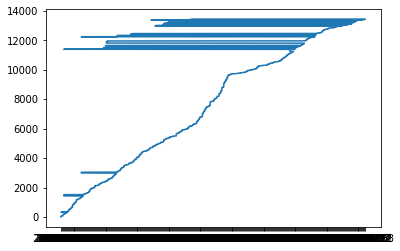

In [26]:
plt.plot(gamesnames.date_played,gamesnames.index)

In [27]:
timegames = games.sort_values('utc_date',ignore_index=True)

In [28]:
timegames

,game_id,game_order,event,site,date_played,round,white,black,result,white_elo,...,termination,time_control,utc_date,utc_time,variant,ply_count,date_created,file_name,group_name_color,group_name_result
0,ef31ac51-3068-4995-8628-569a1c1a7aff,32,Rated Bullet game,https://lichess.org/O5O9kOZF,2017.12.14,?,chessbrahs,DannyTheDonkey,0-1,2827,...,Normal,60+0,2017.12.14,23:17:18,Standard,NaN,2021-12-26T15:21:49+0000,DannytheDonkey.pgn,black,lost
1,2e419131-581e-42c3-9676-cd2037bc557b,30,Rated Bullet game,https://lichess.org/32c3hhCI,2017.12.14,?,chessbrahs,DannyTheDonkey,0-1,2802,...,Normal,60+0,2017.12.14,23:21:29,Standard,NaN,2021-12-26T15:21:49+0000,DannytheDonkey.pgn,black,lost
2,ae598803-361a-4beb-a3d4-09c57b4c70ba,29,Rated Bullet game,https://lichess.org/iT8urXZ9,2017.12.14,?,DannyTheDonkey,chessbrahs,1/2-1/2,2888,...,Normal,60+0,2017.12.14,23:22:33,Standard,NaN,2021-12-26T15:21:49+0000,DannytheDonkey.pgn,black,draw
3,8f6cd49c-2270-44d4-b9a6-67bb680f2dcb,28,Rated Bullet game,https://lichess.org/pi03wKua,2017.12.14,?,chessbrahs,DannyTheDonkey,0-1,2795,...,Normal,60+0,2017.12.14,23:25:02,Standard,NaN,2021-12-26T15:21:49+0000,DannytheDonkey.pgn,black,lost
4,1b57818e-8947-4569-87b9-9053739809bb,27,Rated Bullet game,https://lichess.org/MOAxUxZW,2017.12.14,?,DannyTheDonkey,chessbrahs,0-1,2893,...,Normal,60+0,2017.12.14,23:26:59,Standard,NaN,2021-12-26T15:21:49+0000,DannytheDonkey.pgn,black,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,575410f0-b9f9-45d9-adbc-db1c060385ef,25,Rated Bullet game,https://lichess.org/BbLyaDIY,2021.12.23,?,DrNykterstein,Night-King96,1-0,3295,...,Normal,60+0,2021.12.23,22:04:28,Standard,NaN,2021-12-26T15:22:47+0000,DrNykterstein.pgn,white,won
13438,ce53ab48-5efa-4779-adb9-81e3472005b1,23,Rated Bullet game,https://lichess.org/Vmom5qbo,2021.12.23,?,DrNykterstein,Night-King96,0-1,3289,...,Normal,60+0,2021.12.23,22:07:54,Standard,NaN,2021-12-26T15:22:47+0000,DrNykterstein.pgn,white,lost
13439,26a3e04a-6ea7-46b1-af2f-6d38680a6c34,22,Rated Bullet game,https://lichess.org/3FgYOgw0,2021.12.23,?,Night-King96,DrNykterstein,0-1,3125,...,Normal,60+0,2021.12.23,22:09:17,Standard,NaN,2021-12-26T15:22:47+0000,DrNykterstein.pgn,black,won
13440,e4ccde31-f0c9-4404-92c8-1d2bb8aa5b55,32,Rated Bullet game,https://lichess.org/kKo4VC7y,2021.12.23,?,DrNykterstein,RebeccaHarris,1-0,3283,...,Normal,60+0,2021.12.23,00:16:31,Standard,NaN,2021-12-26T15:22:47+0000,DrNykterstein.pgn,white,won


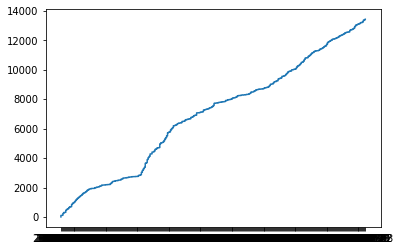

In [29]:
plt.plot(timegames.date_played,timegames.index)

In [48]:
moves = pd.read_csv('csv/carlsen_games_moves.csv')
moves.shape

(1133609, 64)

In [51]:
%store -r cg
cg = cg

In [52]:
# The next few code blocks is an attempt to keep track of Magnus' elo. This also helps when keeping track of his oppponents' elo as well
magnuswhiteelo = cg.loc[(cg.white=='Magnus Carlsen'),['white_elo']]
magnuswhiteelo.reset_index(inplace=True)
magnuswhiteelo

,index,white_elo
0,0,2500
1,3,2566
2,4,2627
3,6,2675
4,9,2652
...,...,...
6737,13433,3191
6738,13435,3196
6739,13437,3202
6740,13439,3207


In [53]:
magnusblackelo = cg.loc[(cg.black=='Magnus Carlsen'),['black_elo']]
magnusblackelo.reset_index(inplace=True)
magnusblackelo

,index,black_elo
0,1,2558
1,2,2493
2,5,2636
3,7,2695
4,8,2702
...,...,...
6695,13432,3188
6696,13434,3193
6697,13436,3199
6698,13438,3204


In [55]:
def mergeelo(row):
    return row.white_elo + row.black_elo

In [56]:
magnuselo = magnuswhiteelo.merge(magnusblackelo,how='outer',on='index',sort=True)
magnuselo = magnuselo.fillna(0)
magnuselo

,index,white_elo,black_elo
0,0,2500.0,0.0
1,1,0.0,2558.0
2,2,0.0,2493.0
3,3,2566.0,0.0
4,4,2627.0,0.0
...,...,...,...
13437,13437,3202.0,0.0
13438,13438,0.0,3204.0
13439,13439,3207.0,0.0
13440,13440,0.0,3209.0


In [57]:
magnuselo['elo']= magnuselo.apply(lambda row: mergeelo(row),axis=1)
magnuselo

,index,white_elo,black_elo,elo
0,0,2500.0,0.0,2500.0
1,1,0.0,2558.0,2558.0
2,2,0.0,2493.0,2493.0
3,3,2566.0,0.0,2566.0
4,4,2627.0,0.0,2627.0
...,...,...,...,...
13437,13437,3202.0,0.0,3202.0
13438,13438,0.0,3204.0,3204.0
13439,13439,3207.0,0.0,3207.0
13440,13440,0.0,3209.0,3209.0


In [58]:
# Doing the same thing to opponent elo now
opponentwhiteelo = cg.loc[(cg.white!='Magnus Carlsen'),['white_elo']]
opponentwhiteelo.reset_index(inplace=True)
opponentblackelo = cg.loc[(cg.black!='Magnus Carlsen'),['black_elo']]
opponentblackelo.reset_index(inplace=True)
opponentelo = opponentwhiteelo.merge(opponentblackelo,how='outer',on='index',sort=True)
opponentelo = opponentelo.fillna(0)
opponentelo['elo']= opponentelo.apply(lambda row: mergeelo(row),axis=1)
opponentelo

,index,white_elo,black_elo,elo
0,0,0.0,2532.0,2532.0
1,1,2420.0,0.0,2420.0
2,2,2754.0,0.0,2754.0
3,3,0.0,2755.0,2755.0
4,4,0.0,2275.0,2275.0
...,...,...,...,...
13437,13437,0.0,2984.0,2984.0
13438,13438,2982.0,0.0,2982.0
13439,13439,0.0,2979.0,2979.0
13440,13440,2977.0,0.0,2977.0


In [65]:
oppres = pd.DataFrame(data=(opponentelo.elo,cg.magnus_result)).T
oppres

,elo,magnus_result
0,2532.0,lost
1,2420.0,lost
2,2754.0,lost
3,2755.0,lost
4,2275.0,lost
...,...,...
13437,2984.0,won
13438,2982.0,won
13439,2979.0,won
13440,2977.0,won


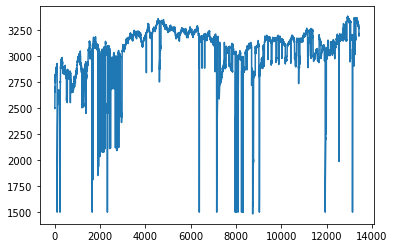

In [66]:
plt.plot(magnuselo.index,magnuselo.elo)
# new accounts start at 1500

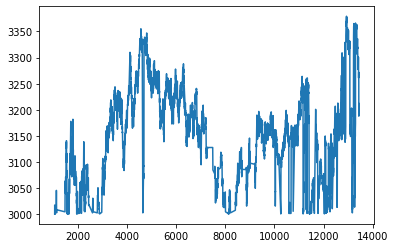

In [67]:
plt.plot(magnuselo.index[magnuselo.elo>3000],magnuselo.elo[magnuselo.elo>3000])
plt.show()
# The rating abruptly changes when Magnus's account or time control changes.
# It's hard to tell when Magnus is climbing to a certain rating from a new account vs when his rating represents his actual strength
# Either way, this plot is not useful since it's not continuous and it's near impossible to figure out which points to connect, if any.

In [68]:
magoppres = pd.DataFrame(data=(magnuselo.elo,opponentelo.elo,cg.magnus_result)).T
magoppres.columns = ['mag_elo','opp_elo','magnus_result']
magoppres
%store magoppres

Stored 'magoppres' (DataFrame)


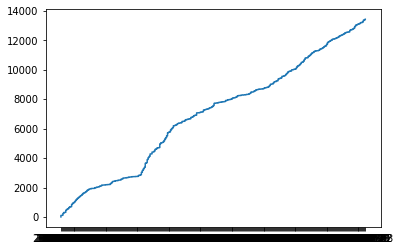

In [69]:
plt.plot(cg.utc_date,cg.index)